**Measure the time to calculate numbers from 0 to 1 from a uniform distribution using the random and numpy modules, depict the dependence of the calculation time on the number of calculated numbers for them. In other words - x is how many numbers you took from 0 to 1 per run, and y is the time it took for random and numpy**

<ipython-input-2-d1682b8e1e4c>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


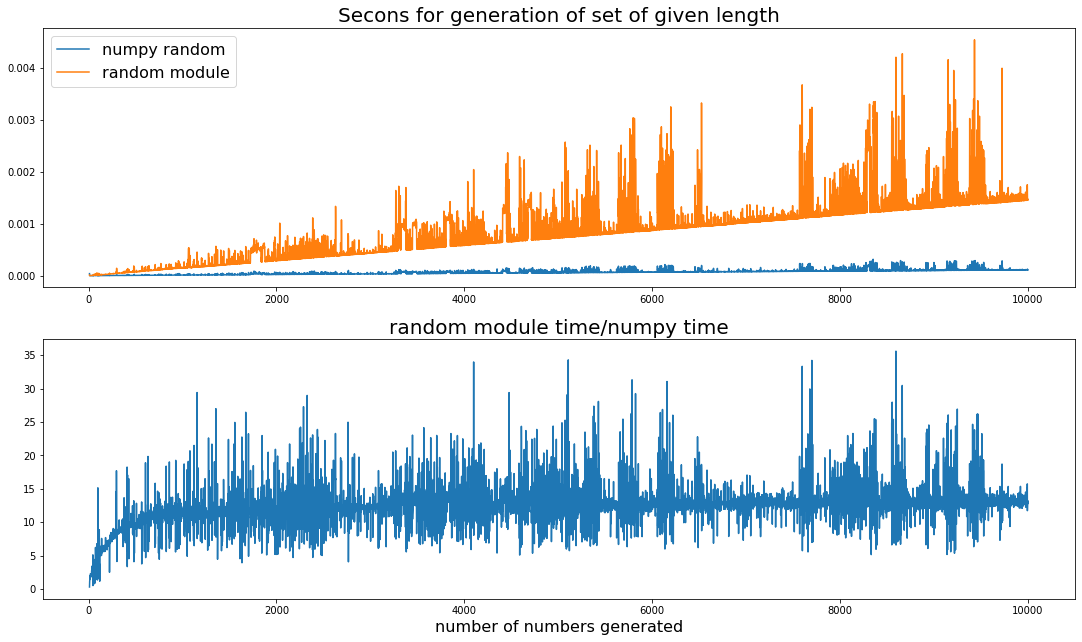

In [2]:
import random
import numpy as np
import time
import matplotlib.pylab as plt
import math

np_y = []
rand_y = []
array_len = []
for i in range(10, 10000):
    first = time.time()
    np.random.random(i)
    second = time.time()
    [random.random() for _ in range(i)]
    third = time.time()
    array_len.append(i)
    np_y.append(second - first)
    rand_y.append(third - second)

ratio = list(map(lambda x,y: x/y, rand_y, np_y))
fig, axs = plt.subplots(2)
fig.set_size_inches(18.5, 10.5)
axs[0].plot(array_len,np_y, label='numpy random')
axs[0].plot(array_len,rand_y, label='random module')
axs[0].set_title('Secons for generation of set of given length', fontsize=20)
plt.xlabel('number of numbers generated', fontsize=16)
axs[0].legend(fontsize=16)
axs[1].plot(array_len,ratio)
axs[1].set_title('random module time/numpy time', fontsize=20)
fig.show()

**Make a function to check if the list is sorted (without using sorted or sort). Then implement monkey sort, and then visualize the following: the distribution of the algorithm's running time from the size of the sorted list. That is, x is the size of the array, and y is the average time of several runs and their deviation (or variance)**

In [170]:
def is_sorted(lst):
    for i in range(1, len(lst)):
        if lst[i] < lst[i-1]:
            return False
    return True


def bogosort(lst):
    flag_sorted = False
    while flag_sorted is False:    
        np,random.shuffle(lst)
        flag_sorted = is_sorted(lst)
    return lst


def speed_test(func):
    length, means, stds = [], [], []
    for i in range(2, 11):
        values = []
        for j in range(10):
            lst = np.random.randint(0, 10, i)
            start = time.time()
            func(lst)
            end = time.time()
            value = end - start
            values.append(value)
#             print(f'Sorted of array of len {i} in {value} seconds')
        length.append(i)
        means.append(np.mean(values))
        stds.append(np.std(values))
    return length, means, stds
        
length, means, stds = speed_test(bogosort)            
plt.errorbar(length, means, stds, marker='^')
plt.title('Stupid Monkey Permutation Bogosort', fontsize=16)
plt.ylabel('Time, s.',fontsize=16)
plt.xlabel('Set length',fontsize=16)
plt.yscale('log')

Sorted of len 2 in 4.6253204345703125e-05 seconds
Sorted of len 2 in 3.5762786865234375e-05 seconds
Sorted of len 2 in 6.270408630371094e-05 seconds
Sorted of len 2 in 4.267692565917969e-05 seconds
Sorted of len 2 in 2.193450927734375e-05 seconds
Sorted of len 2 in 2.384185791015625e-05 seconds
Sorted of len 2 in 3.528594970703125e-05 seconds
Sorted of len 2 in 3.7670135498046875e-05 seconds
Sorted of len 2 in 7.462501525878906e-05 seconds
Sorted of len 2 in 4.5299530029296875e-05 seconds
Sorted of len 3 in 0.0004296302795410156 seconds
Sorted of len 3 in 0.0003769397735595703 seconds
Sorted of len 3 in 9.703636169433594e-05 seconds
Sorted of len 3 in 0.00013184547424316406 seconds
Sorted of len 3 in 3.743171691894531e-05 seconds
Sorted of len 3 in 0.00012040138244628906 seconds
Sorted of len 3 in 0.000377655029296875 seconds
Sorted of len 3 in 0.0003561973571777344 seconds
Sorted of len 3 in 7.05718994140625e-05 seconds
Sorted of len 3 in 0.00016760826110839844 seconds
Sorted of len 4

**Render a random walk in 2-dimensional space where you start at (0, 0) and can move up, down, right and left.**

Text(0.5, 1.0, 'Random walk around here')

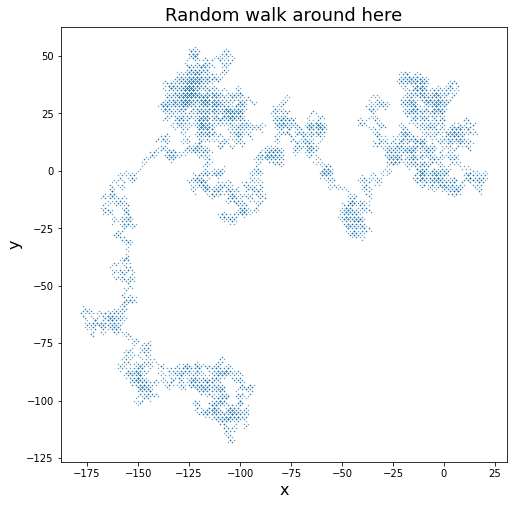

In [246]:
def random_walk_descreate(n):
    '''
    Generates random walk from a start point (0,0)
    Descreate steps - either -1 or 1.
    @params - n - total number of steps
    @return Xs, Ys  - lists of x and y coords of head position respectively
    '''
    x, y = 0, 0
    Xs, Ys = [], []
    move = [-1, 1]
    for i in range(n):
        x += np.random.choice(move)
        y += np.random.choice(move)
        Xs.append(x)
        Ys.append(y)
    return Xs, Ys
        
x, y = random_walk_descreate(10000)
plt.figure(figsize=(8, 8))
plt.scatter(x,y, s=0.1)
plt.ylabel('y', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.title('Random walk around here', fontsize=18)

Text(0.5, 1.0, 'Random walk around here')

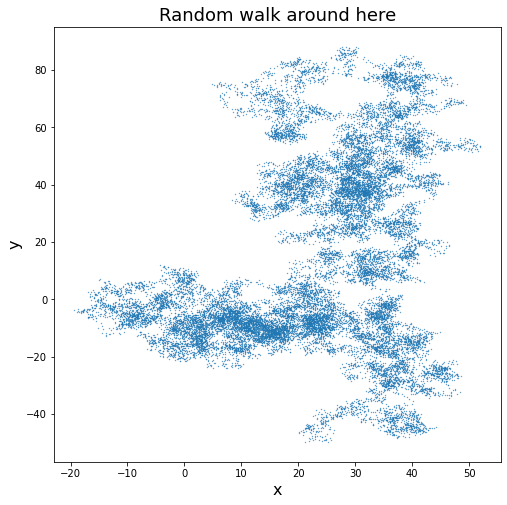

In [275]:
def random_walk(n):
    '''
    Generates random walk from a start point (0,0)
    Float steps between -1 an 1.
    @params - n - total number of steps
    @return Xs, Ys  - lists of x and y coords of head position respectively
    '''
    x, y = 0, 0
    Xs, Ys = [], []
    for i in range(n):
        x += np.random.uniform(-1,1)
        y += np.random.uniform(-1,1)
        Xs.append(x)
        Ys.append(y)
    return Xs, Ys
        
x, y = random_walk(25000)
plt.figure(figsize=(8, 8))
plt.scatter(x,y, s=0.1)
plt.ylabel('y', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.title('Random walk around here', fontsize=18)

**Generate and draw the Sierpinski triangle.**

Text(0.5, 1.0, 'Random walk around here')

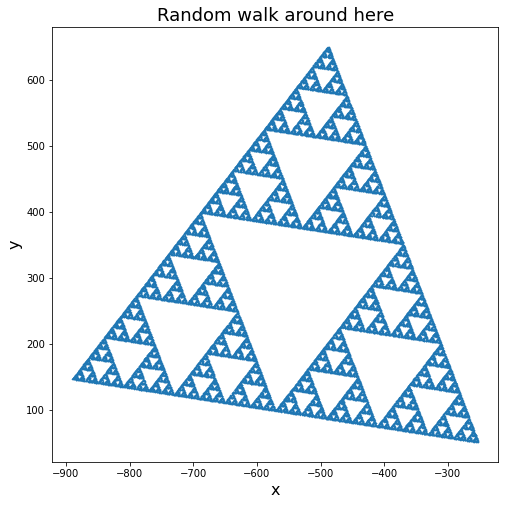

In [290]:
import math
def generate_triangle():
    x1, y1, x2, y2 = np.random.uniform(-1000,1000,4)
    dx = x2 - x1
    dy = y2 - y1
    alpha = 60./180*math.pi
    # rotate the displacement vector and add the result back to the original point
    x3 = x1 + math.cos( alpha)*dx + math.sin(alpha)*dy
    y3 = y1 + math.sin(-alpha)*dx + math.cos(alpha)*dy
    return np.array([x1, y1, x2, y2, x3, y3]).reshape(3,2)

def sierpinsky_triangle(loops):
    coords = generate_triangle()
    x = coords[0,0] + (coords[1,0] - coords[0,0])/2
    y = coords[0,1] + (coords[1,1]-coords[0,1])/2
    Xs, Ys = [],[]
    for i in range(loops):
        vertice = np.random.choice([0, 1, 2])
        x += (coords[vertice, 0] - x)/2
        y += (coords[vertice, 1] - y)/2
        Xs.append(x)
        Ys.append(y)
    return Xs, Ys


x, y = sierpinsky_triangle(100000)
plt.figure(figsize=(8, 8))
plt.scatter(x,y, s=0.1)
plt.ylabel('y', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.title('Random walk around here', fontsize=18)    

**Make a program that receives a text as input and produces the same text with the following changes - the letters in all words except the first and last are mixed.**


In [13]:
text = 'all work and no play makes jack a dull boy'
def scramble(text):
    words = text.split()
    new_words = []
    for word in words:
        if len(word) >= 2:
            first, middle, last = word[0], list(word[1:-1]), word[-1]
            np.random.shuffle(middle)
            new_words.append(first + ''.join(middle) + last)
        else:
            new_words.append(word)
    return " ".join(new_words)
scramble(text)

'all wrok and no paly mkaes jack a dlul boy'